# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

In [35]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df= pd.read_csv('/content/drive/MyDrive/python/dicoding/data_clustering.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TransactionAmount                 2485 non-null   float64
 1   PreviousTransactionDate           2485 non-null   object 
 2   TransactionType                   2485 non-null   float64
 3   Location                          2485 non-null   float64
 4   Channel                           2485 non-null   float64
 5   CustomerAge                       2485 non-null   float64
 6   CustomerOccupation                2485 non-null   float64
 7   TransactionDuration               2485 non-null   float64
 8   LoginAttempts                     2485 non-null   float64
 9   AccountBalance                    2485 non-null   float64
 10  TransactionDate                   2485 non-null   object 
 11  TransactionFrequency              2485 non-null   float64
 12  Transa

In [38]:
df = df.drop(['PreviousTransactionDate', 'TransactionDate', 'CustomerAge_Binned', 'TransactionAmount_Binned', 'TransactionDuration', 'LoginAttempts' ], axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TransactionAmount                 2485 non-null   float64
 1   TransactionType                   2485 non-null   float64
 2   Location                          2485 non-null   float64
 3   Channel                           2485 non-null   float64
 4   CustomerAge                       2485 non-null   float64
 5   CustomerOccupation                2485 non-null   float64
 6   AccountBalance                    2485 non-null   float64
 7   TransactionFrequency              2485 non-null   float64
 8   TransactionType_Encoded           2485 non-null   float64
 9   TimeSinceLastTransaction          2485 non-null   float64
 10  CustomerAge_Binned_Encoded        2485 non-null   int64  
 11  TransactionAmount_Binned_Encoded  2485 non-null   int64  
 12  Target

# **3. Data Splitting**


In [40]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1988, 12)
Shape of X_test: (497, 12)
Shape of y_train: (1988,)
Shape of y_test: (497,)


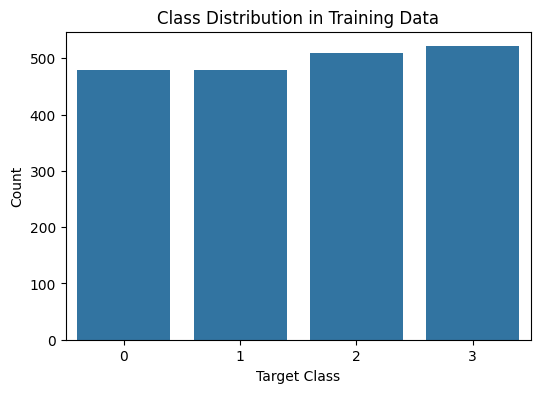

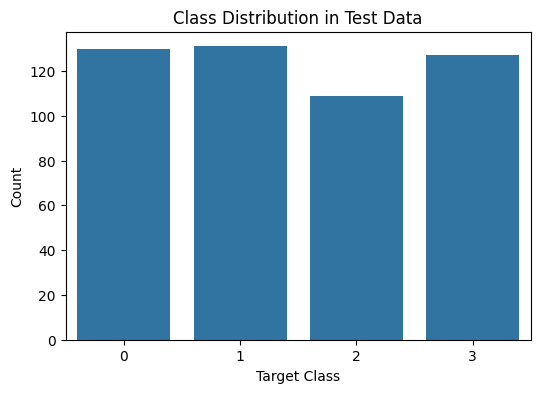

Class distribution in training data:
Target
3    521
2    509
1    479
0    479
Name: count, dtype: int64

Class distribution in test data:
Target
1    131
0    130
3    127
2    109
Name: count, dtype: int64


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class imbalance and visualize it
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title('Class Distribution in Test Data')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

print("Class distribution in training data:")
print(y_train.value_counts())
print("\nClass distribution in test data:")
print(y_test.value_counts())


# **4. Membangun Model Klasifikasi**


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Menggunakan Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       127

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



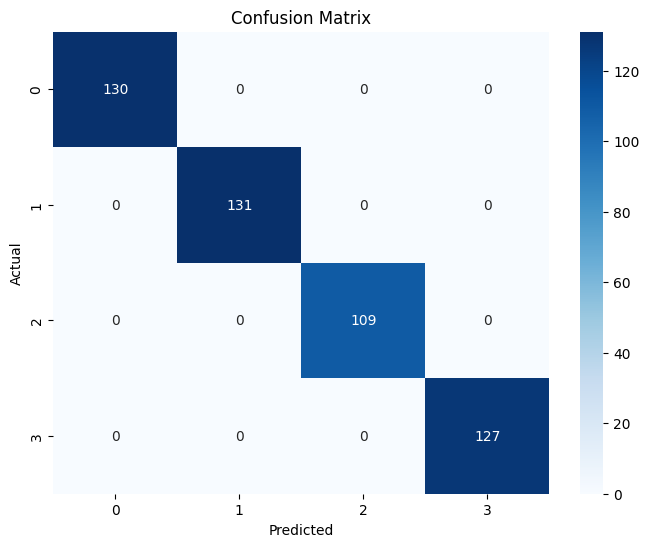

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan confusion matrix dan heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

Matthews Correlation Coefficient (MCC): 1.0


In [45]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/python/dicoding/decision_tree_model.h5')

['/content/drive/MyDrive/python/dicoding/decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       127

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



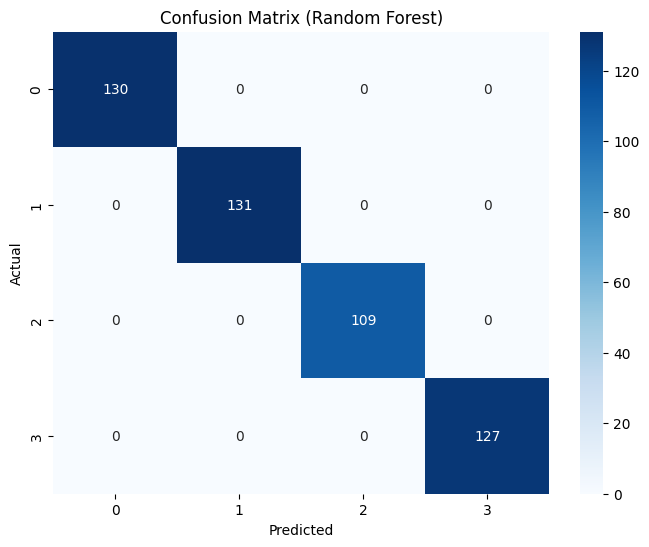

Matthews Correlation Coefficient (MCC) (Random Forest): 1.0


['/content/drive/MyDrive/python/dicoding/random_forest_model.h5']

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Menggunakan Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model menggunakan data latih
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Tampilkan classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Tampilkan confusion matrix dan heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print("Matthews Correlation Coefficient (MCC) (Random Forest):", mcc_rf)

joblib.dump(model_rf, '/content/drive/MyDrive/python/dicoding/random_forest_model.h5')

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       127

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



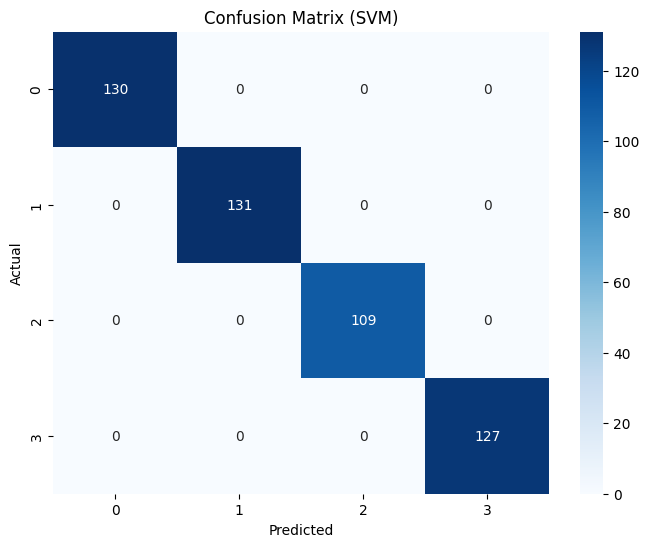

Matthews Correlation Coefficient (MCC) (SVM): 1.0


['/content/drive/MyDrive/python/dicoding/svm_model.h5']

In [47]:
from sklearn.svm import SVC
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
print("Matthews Correlation Coefficient (MCC) (SVM):", mcc_svm)
joblib.dump(model_svm, '/content/drive/MyDrive/python/dicoding/svm_model.h5')


Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       1.00      0.99      1.00       131
           2       0.97      1.00      0.99       109
           3       0.99      1.00      1.00       127

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



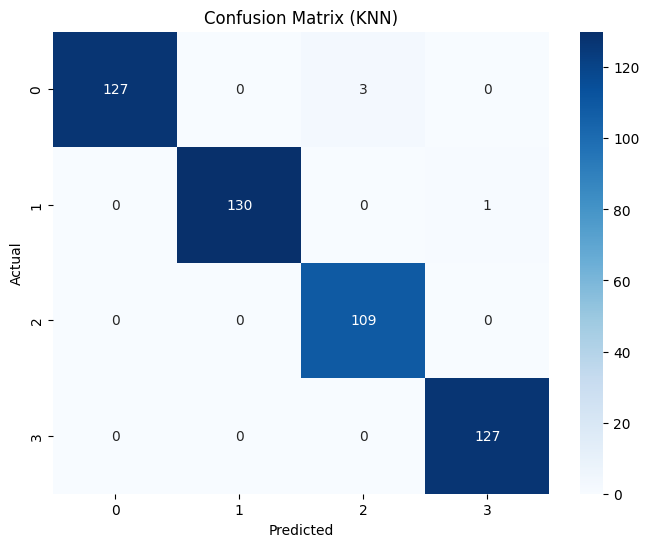

Matthews Correlation Coefficient (MCC) (KNN): 0.989307866090584


['/content/drive/MyDrive/python/dicoding/knn_model.h5']

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
print("Matthews Correlation Coefficient (MCC) (KNN):", mcc_knn)
joblib.dump(model_knn, '/content/drive/MyDrive/python/dicoding/knn_model.h5')

Hyperparameter Tuning Model


In [49]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_pred_tuned = best_model.predict(X_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00       127

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497



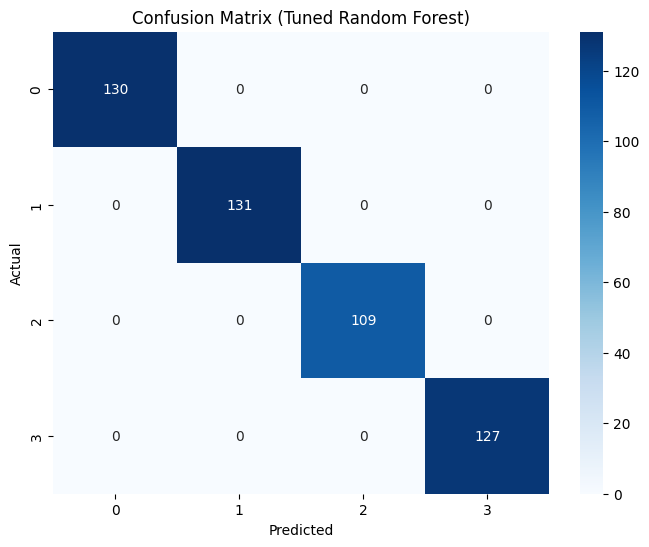

Matthews Correlation Coefficient (MCC) (Tuned Random Forest): 1.0


In [50]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

# Tampilkan classification report
print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_tuned))

# Tampilkan confusion matrix dan heatmap
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

mcc_tuned = matthews_corrcoef(y_test, y_pred_tuned)
print("Matthews Correlation Coefficient (MCC) (Tuned Random Forest):", mcc_tuned)


In [51]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification reports for each model
report_dt = classification_report(y_test, y_pred, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

# Create dictionaries to store metrics for each model
results_dt = report_dt['weighted avg']
results_rf = report_rf['weighted avg']
results_svm = report_svm['weighted avg']
results_knn = report_knn['weighted avg']
results_rf_tuned = report_rf_tuned['weighted avg']

# Add MCC to the results
results_dt['matthews_corrcoef'] = mcc
results_rf['matthews_corrcoef'] = mcc_rf
results_svm['matthews_corrcoef'] = mcc_svm
results_knn['matthews_corrcoef'] = mcc_knn
results_rf_tuned['matthews_corrcoef'] = mcc_tuned


# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Decision Tree': results_dt,
    'Random Forest': results_rf,
    'SVM': results_svm,
    'KNN': results_knn,
    'Tuned Random Forest': results_rf_tuned
}).T

# Display the comparison table
print("Comparison of Classification Reports:")
print(comparison_df[['precision', 'recall', 'f1-score', 'matthews_corrcoef']].to_markdown(numalign="left", stralign="left"))

Comparison of Classification Reports:
|                     | precision   | recall   | f1-score   | matthews_corrcoef   |
|:--------------------|:------------|:---------|:-----------|:--------------------|
| Decision Tree       | 1           | 1        | 1          | 1                   |
| Random Forest       | 1           | 1        | 1          | 1                   |
| SVM                 | 1           | 1        | 1          | 1                   |
| KNN                 | 0.992129    | 0.991952 | 0.991958   | 0.989308            |
| Tuned Random Forest | 1           | 1        | 1          | 1                   |


In [52]:
joblib.dump(best_model, '/content/drive/MyDrive/python/dicoding/tuned_random_forest_model.h5')

['/content/drive/MyDrive/python/dicoding/tuned_random_forest_model.h5']

End of Code